# ***Đồ án môn học Nhập môn Phân tích dữ liệu và Học sâu***

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Hàm tải dữ liệu
def load_data():
    df = pd.read_csv("vietnam_housing_dataset.csv")
    return df
df = load_data()


# **Mô tả dữ liệu**

,Address,Area,Frontage,Access Road,House direction,Balcony direction,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price
0,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",84.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,Have certificate,NaN,8.60
1,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",60.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,7.50
2,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",90.0,6.0,13.0,Đông - Bắc,Đông - Bắc,5.0,NaN,NaN,Sale contract,NaN,8.90
3,"Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...",54.0,NaN,3.5,Tây - Nam,Tây - Nam,2.0,2.0,3.0,Have certificate,Full,5.35
4,"Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh",92.0,NaN,NaN,Đông - Nam,Đông - Nam,2.0,4.0,4.0,Have certificate,Full,6.90


Frontage             11564
Access Road          13297
House direction      21239
Balcony direction    24983
Floors                3603
Bedrooms              5162
Bathrooms             7074
Legal status          4506
Furniture state      14119
dtype: int64

count    30229.000000
mean         5.872078
std          2.211877
min          1.000000
25%          4.200000
50%          5.900000
75%          7.500000
max         11.500000
Name: Price, dtype: float64

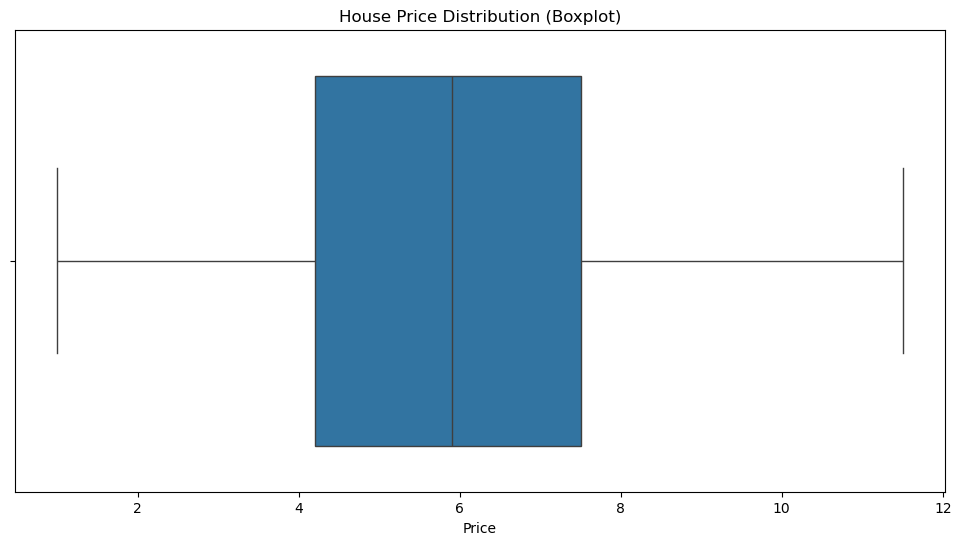

Tên các cột trong dữ liệu: Index(['Address', 'Area', 'Frontage', 'Access Road', 'House direction',
       'Balcony direction', 'Floors', 'Bedrooms', 'Bathrooms', 'Legal status',
       'Furniture state', 'Price'],
      dtype='object')


In [9]:
#Hàm print dữ liệu
def print_data(df):
    display(df.head())
print_data(df)

# Kiểm tra dữ liệu bị thiếu
missing_values = df.isnull().sum()
display(missing_values[missing_values > 0])

# Phân tích thống kê giá nhà
display(df["Price"].describe())

# Biểu đồ phân phối giá nhà
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Price"])
plt.title("House Price Distribution (Boxplot)")
plt.show()

# Kiểm tra xem có cột thời gian không
print("Tên các cột trong dữ liệu:", df.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 27096 entries, 2 to 30228
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Address            27096 non-null  object 
 1   Area               27096 non-null  float64
 2   Frontage           27096 non-null  float64
 3   Access Road        27096 non-null  float64
 4   House direction    8874 non-null   object 
 5   Balcony direction  5242 non-null   object 
 6   Floors             27096 non-null  float64
 7   Bedrooms           27096 non-null  float64
 8   Bathrooms          27096 non-null  float64
 9   Legal status       24322 non-null  object 
 10  Furniture state    15934 non-null  object 
 11  Price              27096 non-null  float64
dtypes: float64(7), object(5)
memory usage: 2.7+ MB


None

,Address,Area,Frontage,Access Road,House direction,Balcony direction,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price
2,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",90.0,6.0,13.0,Đông - Bắc,Đông - Bắc,5.0,3.0,3.0,Sale contract,NaN,8.90
3,"Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...",54.0,4.5,3.5,Tây - Nam,Tây - Nam,2.0,2.0,3.0,Have certificate,Full,5.35
4,"Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh",92.0,4.5,5.5,Đông - Nam,Đông - Nam,2.0,4.0,4.0,Have certificate,Full,6.90
5,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",91.0,7.0,13.0,Tây - Bắc,NaN,3.0,3.0,3.0,Have certificate,NaN,9.80
7,"Dự án Him Lam Thường Tín, Huyện Thường Tín, Hà...",74.0,5.0,18.0,Nam,Nam,5.0,4.0,5.0,Have certificate,NaN,9.90


House direction      18222
Balcony direction    21854
Legal status          2774
Furniture state      11162
dtype: int64

,Area,Frontage,Access Road,Floors,Bedrooms,Bathrooms,Price
max,595.000000,77.000000,85.000000,10.000000,9.000000,9.000000,11.500000
min,3.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mean,67.464284,5.073348,6.920554,3.363596,3.467191,3.297793,5.838155
std,46.852042,3.598399,5.913382,1.283073,1.258517,1.295985,2.206988


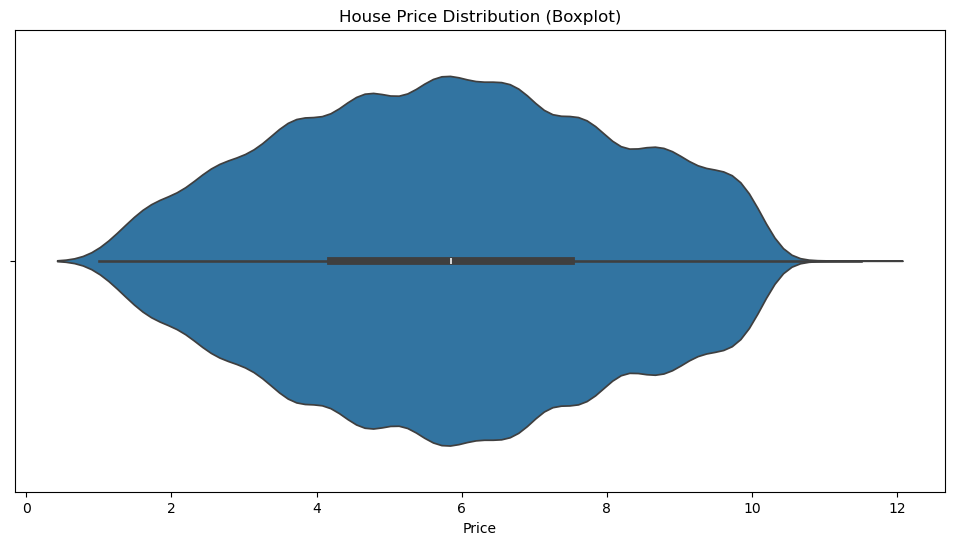

Tên các cột trong dữ liệu: Index(['Address', 'Area', 'Frontage', 'Access Road', 'House direction',
       'Balcony direction', 'Floors', 'Bedrooms', 'Bathrooms', 'Legal status',
       'Furniture state', 'Price'],
      dtype='object')


In [ ]:
# Tiền xử lý dữ liệu
# Loại bỏ các dòng có giá trị bị thiếu quá nhiều (tùy vào ngưỡng)
df.dropna(thresh=len(df.columns) * 0.5, inplace=True)

# Điền giá trị trung bình cho các cột số bị thiếu
df.fillna(df.median(numeric_only=True), inplace=True)

# Hiển thị thông tin tổng quan về dữ liệu
display(df.info())
display(df.head())

# Kiểm tra dữ liệu bị thiếu
missing_values = df.isnull().sum()
display(missing_values[missing_values > 0])

# Mô tả dữ liệu: Max, Min, Mean, STD
descriptive_stats = df.describe().loc[["max", "min", "mean", "std"]]
display(descriptive_stats)

# Biểu đồ phân phối giá nhà
plt.figure(figsize=(12, 6))
sns.violinplot(x=df["Price"])
plt.title("House Price Distribution (Violin Plot)")
plt.show()

# Kiểm tra xem có cột thời gian không
print("Tên các cột trong dữ liệu:", df.columns)